# Prediksi Peningkatan Suhu - Warm Up Datavidia 9

## Prepare Dataset

### Import Library

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Import Datasheet

In [34]:
df_train = pd.read_csv("datasheet/train.csv")
df_test = pd.read_csv("datasheet/test.csv")

### Definisikan Fitur (X) dan Target(Y)

In [35]:
# Target (label) yang akan diprediksi
target_column = "Peningkatan Suhu Rata - Rata ° C"

# Pisahkan fitur (X) dan target (y) pada train set
X = df_train.drop(columns=[target_column])
y = df_train[target_column]


## Preprocesing Data

### Memisahkan Negara dengan tahun dan Menghapus Kolom yang tidak berguna untuk modeling

In [36]:
# Pisahkan 'Negara' dan 'Tahun' dari kolom 'Negara/Tahun'
X[['Negara', 'Tahun']] = X['Negara/Tahun'].str.split('/', expand=True)
df_test[['Negara', 'Tahun']] = df_test['Negara/Tahun'].str.split('/', expand=True)

# Hapus kolom 'Negara/Tahun' karena sudah dipisah
X.drop(columns=['Negara/Tahun'], inplace=True)
df_test.drop(columns=['Negara/Tahun'], inplace=True)


### Memastikan  colom tahun berupa yang modelling bersfiat numerik

In [37]:
X['Tahun'] = X['Tahun'].astype(int)
df_test['Tahun'] = df_test['Tahun'].astype(int)

### Menggunakan One-hot encoding pada datasheet colomn Negara

In [38]:
X = pd.get_dummies(X, columns=['Negara'])
df_test = pd.get_dummies(df_test, columns=['Negara'])


### Memastikan kolm di X_test sama dengan X_train 

In [39]:
# Menyamakan fitur antara X dan df_test
missing_cols = set(X.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0  

extra_cols = set(df_test.columns) - set(X.columns)
df_test.drop(columns=extra_cols, inplace=True)  

# Sesuaikan urutan kolom di df_test agar sama dengan X
df_test = df_test[X.columns]

# Mengisi missing values jika ada
X = X.fillna(0)
df_test = df_test.fillna(0)

## Modeling dengan metode Random Forest Formula

$ \hat{y} = \frac{1}{N} \sum_{i=1}^{N} T_i(X) $  

keterangan:  
- $ \hat{y} $ adalah prediksi akhir.  
- $ N $ adalah jumlah pohon keputusan (Decision Tree) dalam hutan.  
- $ T_i(X) $ adalah prediksi dari pohon ke-$ i $ untuk input $ X $.  


### Split data pada datasheet train untuk evaluasi model (80% train, 20% validation)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model & Prediction utk  Evaluasi 

In [41]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

In [42]:
def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [43]:
mape_score = mape(y_val.to_numpy(), y_val_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape_score:.2f} %")

Mean Absolute Percentage Error (MAPE): 99.13 %


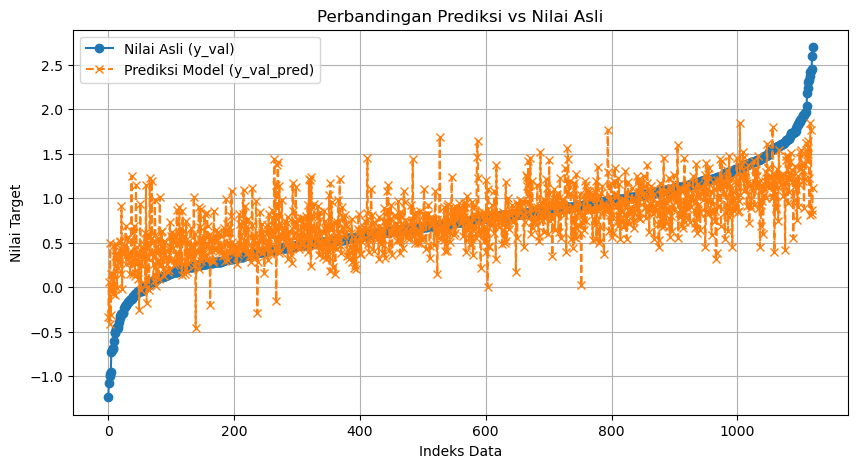

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Urutkan nilai untuk visualisasi yang lebih rapi
sorted_indices = np.argsort(y_val)
y_val_sorted = np.array(y_val)[sorted_indices]
y_val_pred_sorted = y_val_pred[sorted_indices]

# Plot hasil prediksi vs nilai asli
plt.figure(figsize=(10, 5))
plt.plot(y_val_sorted, label="Nilai Asli (y_val)", linestyle='-', marker='o')
plt.plot(y_val_pred_sorted, label="Prediksi Model (y_val_pred)", linestyle='--', marker='x')

# Label dan judul
plt.xlabel("Indeks Data")
plt.ylabel("Nilai Target")
plt.title("Perbandingan Prediksi vs Nilai Asli")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


In [45]:
f2_score = r2_score(y_val, y_val_pred)

print(f"F2 Score: {f2_score:.2f}")

F2 Score: 0.45


In [46]:
def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape(y_val.to_numpy(), y_val_pred)

99.12796578300917

### Prediksi untuk datasheet test

In [47]:
# Prediksi pada dataset test
y_test_pred = model.predict(df_test)

# Simpan hasil prediksi ke dalam DataFrame
df_test['Peningkatan Suhu Rata - Rata ° C'] = y_test_pred

if 'id' not in df_test.columns:
    df_test['id'] = range(0, len(df_test))  # Gunakan len(df_test) saja tanpa +1


df_submission = df_test[['id', 'Peningkatan Suhu Rata - Rata ° C']]
df_submission.to_csv("submission2.csv", index=False)